
## Unsupervised learning with KMeans clustering


### In this exercise, we will:
- load BBC news data into pandas dataframe
- encode text into tfidf vectors
- use KMeans to cluster encoded text into 5 clusters
- convert different clusters number into category label for each record
- compare clustered category with real category and calculate the total accuracy
- improve the accuracy by select different KMeans parameters
- instead of picking 5 categories, pretend we did not know the categories, use KMeans algorithms to find the best number of clusters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [2]:
df = pd.read_csv('kaggle_data/bbc-text.csv')
print(df.shape, df['category'].nunique())
df.head(2)

(2225, 2) 5


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...


### Check the news categories and the number of samples for each category

In [3]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

### In order to run KMeans cluster on text, we need to encode text into vector of numeric representation, here we choose TfidfVectorizer

In [4]:
vec = TfidfVectorizer()
encoded_x = vec.fit_transform(df['text'])
encoded_x.shape

(2225, 29421)

In [5]:
from sklearn.cluster import KMeans
model = KMeans(5, n_init=10, random_state=42)
model.fit(encoded_x)
model.labels_

array([1, 4, 0, ..., 3, 1, 0], dtype=int32)

In [6]:
df['cluster'] = model.labels_

In [7]:
df.head(20)

,category,text,cluster
0,tech,tv future in the hands of viewers with home th...,1
1,business,worldcom boss left books alone former worldc...,4
2,sport,tigers wary of farrell gamble leicester say ...,0
3,sport,yeading face newcastle in fa cup premiership s...,0
4,entertainment,ocean s twelve raids box office ocean s twelve...,3
5,politics,howard hits back at mongrel jibe michael howar...,2
6,politics,blair prepares to name poll date tony blair is...,2
7,sport,henman hopes ended in dubai third seed tim hen...,0
8,sport,wilkinson fit to face edinburgh england captai...,0
9,entertainment,last star wars not for children the sixth an...,3


Here we see that each cluster can be mapped to a category nicely, but sample index 19 is mapped to cluster 4 which seems to correspond to business, not tech. Let's exam how data are clustered for each category then we can find the most suited cluster number for each category 

In [8]:
for cat in df['category'].unique():
	mark = df['category'] == cat
	print(f"{cat}\n{df[mark]['cluster'].value_counts()}\n")


tech
1    370
3     19
4     12
Name: cluster, dtype: int64

business
4    491
2      8
1      6
3      4
0      1
Name: cluster, dtype: int64

sport
0    358
3    135
4     17
2      1
Name: cluster, dtype: int64

entertainment
3    364
4     14
1      6
0      1
2      1
Name: cluster, dtype: int64

politics
2    352
4     40
3     22
1      3
Name: cluster, dtype: int64



### Now we assign cluster number to a category if most sample data has the cluster number for the category

In [12]:
cluster_to_category = {}
for cat in df['category'].unique():
	mark = df['category'] == cat
	top = df[mark]['cluster'].value_counts().head(1)
	count = top.values[0]
	cluster = top.index[0]
	print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
	cluster_to_category[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category

tech:
 Top cluster number: 1, Number of samples: 370
business:
 Top cluster number: 4, Number of samples: 491
sport:
 Top cluster number: 0, Number of samples: 358
entertainment:
 Top cluster number: 3, Number of samples: 364
politics:
 Top cluster number: 2, Number of samples: 352

Map cluster number to category:


{1: 'tech', 4: 'business', 0: 'sport', 3: 'entertainment', 2: 'politics'}

### Add the clustered_category to data frame

In [18]:
df['clustered_category'] = df['cluster'].map(cluster_to_category)
df.head(20)

,category,text,cluster,clustered_category
0,tech,tv future in the hands of viewers with home th...,1,tech
1,business,worldcom boss left books alone former worldc...,4,business
2,sport,tigers wary of farrell gamble leicester say ...,0,sport
3,sport,yeading face newcastle in fa cup premiership s...,0,sport
4,entertainment,ocean s twelve raids box office ocean s twelve...,3,entertainment
5,politics,howard hits back at mongrel jibe michael howar...,2,politics
6,politics,blair prepares to name poll date tony blair is...,2,politics
7,sport,henman hopes ended in dubai third seed tim hen...,0,sport
8,sport,wilkinson fit to face edinburgh england captai...,0,sport
9,entertainment,last star wars not for children the sixth an...,3,entertainment


In [28]:
print('Overall accuracy of clustered categories:')
print(np.mean(df['category'] == df['clustered_category']))

Overall accuracy of clustered categories:
0.8696629213483146


### Instead of specifying 5 clusters, pretend we did not know the categories, use KMeans algorithms to find the best number of clusters

In [29]:
n_clusters = 12
distances = []
for n in range(1, n_clusters + 1):
	kmeans = KMeans(n, random_state=42)
	kmeans.fit(encoded_x)
	print("Number of clusters: ", n, "Sum of squared distance: ", kmeans.inertia_)
	distances.append(kmeans.inertia_)


Number of clusters:  1 Sum of squared distance:  1974.3754283042276
Number of clusters:  2 Sum of squared distance:  1957.1365105179764
Number of clusters:  3 Sum of squared distance:  1942.2173683393246
Number of clusters:  4 Sum of squared distance:  1930.8425296674695
Number of clusters:  5 Sum of squared distance:  1920.0011060049512
Number of clusters:  6 Sum of squared distance:  1916.0372356939213
Number of clusters:  7 Sum of squared distance:  1905.2578684034077
Number of clusters:  8 Sum of squared distance:  1899.2288335103494
Number of clusters:  9 Sum of squared distance:  1893.7690769909643
Number of clusters:  10 Sum of squared distance:  1886.5330582492595
Number of clusters:  11 Sum of squared distance:  1879.2163012469107
Number of clusters:  12 Sum of squared distance:  1875.7941295389846


### Check the change of sum of squared distance when number of clusters increase by 1

In [31]:
change_of_distance = [x - y for x, y in zip(distances[:-1], distances[1:])]
change_of_distance

[17.23891778625125,
 14.919142178651782,
 11.37483867185506,
 10.84142366251831,
 3.9638703110299502,
 10.779367290513619,
 6.029034893058224,
 5.45975651938511,
 7.236018741704811,
 7.316757002348822,
 3.4221717079260543]

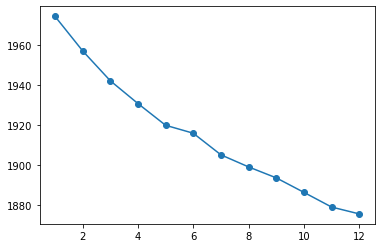

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1, n_clusters + 1), distances, 'o-')
# plt.plot([1, 5], [distances[0], distances[4]], 'go--')
# plt.plot([5, 12], [distances[4], distances[11]], 'ro--')

### From above we can see that, though not very obvious, the elbow is roughly at n = 5 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(encoded_x.toarray())
x_pca.shape

In [ ]:
x_pca

In [ ]:
plt.figure(figsize=(18, 12))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=model.labels_, cmap="coolwarm")
plt.colorbar()